In [1]:
from pathlib import Path
import numpy as np


import geopandas as gpd

import rasterio as rio
import matplotlib.pyplot as plt


from GDRT.raster.register_images import align_two_rasters
from GDRT.raster.registration_algorithms import sitk_intensity_registration

In [2]:
DATA_FOLDER = "/ofo-share/repos-david/UCNRS-experiments/data/"
RASTER_FOLDER = "CHMs"
RASTER_PREFIX = "chm-ptcloud"

DATASET_IDS = [
    ("479", "912"),
    ("479", "610"),
    ("559", "610"),
    ("566", "610"),
    ("567", "610"),
    ("568", "610"),
    ("479", "611"),
    ("548", "611"),
    ("559", "611"),
    ("570", "611"),
    ("479", "612"),
    ("549", "612"),
]


TARGET_GSD = 0.5

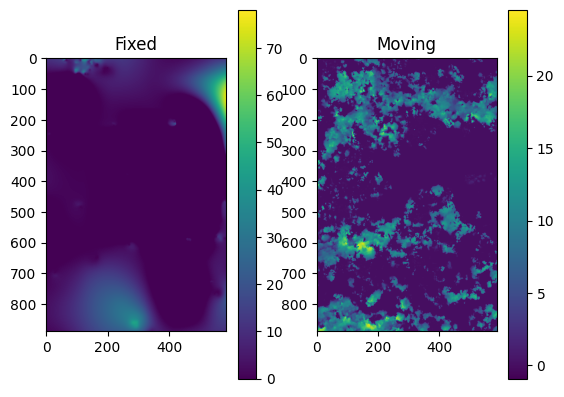

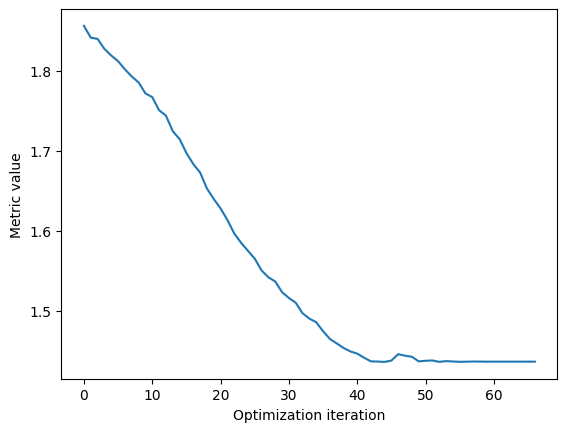

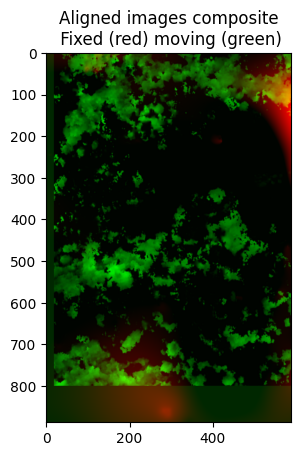

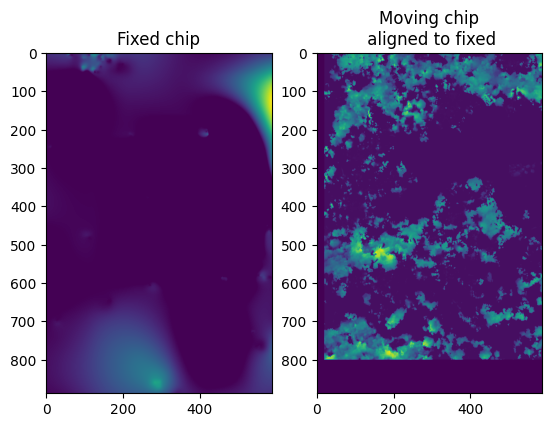

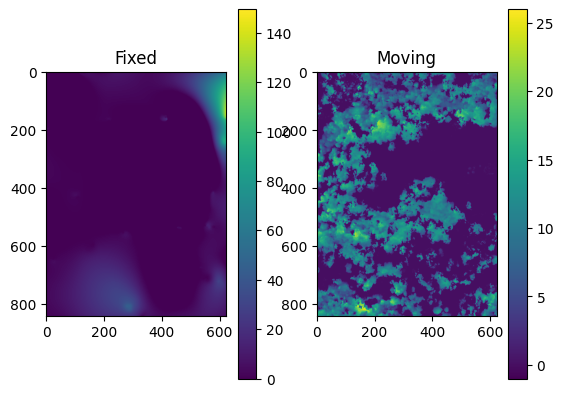

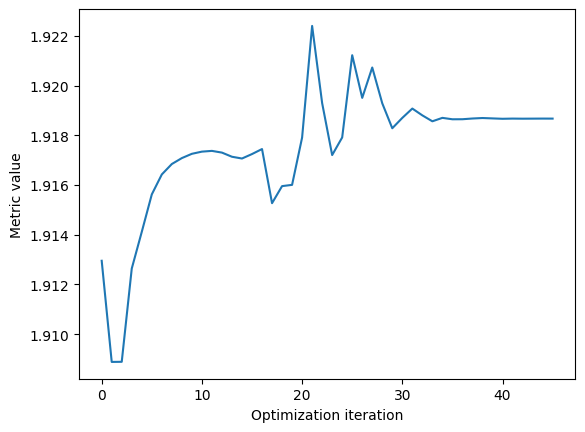

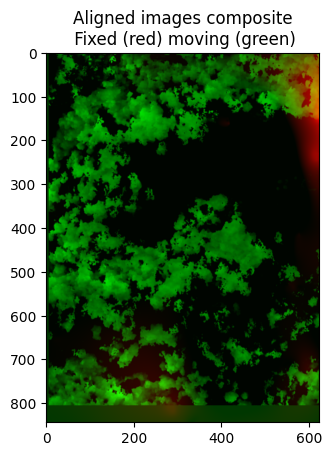

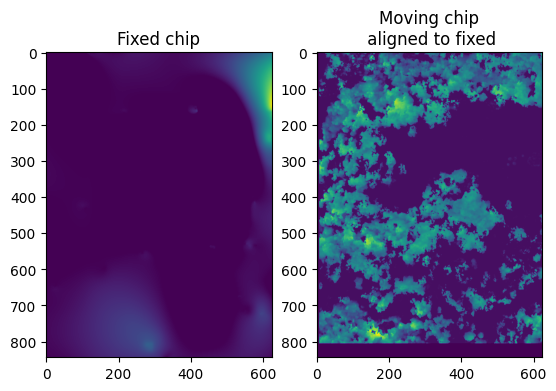

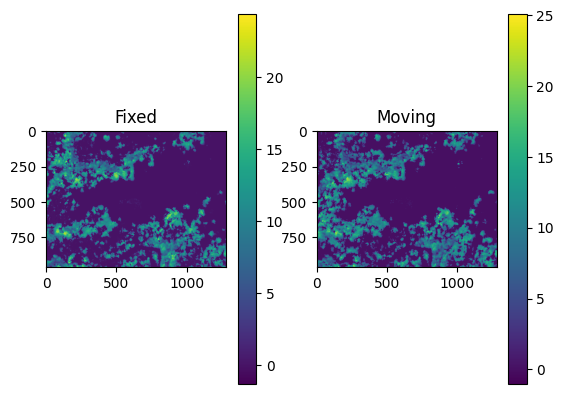

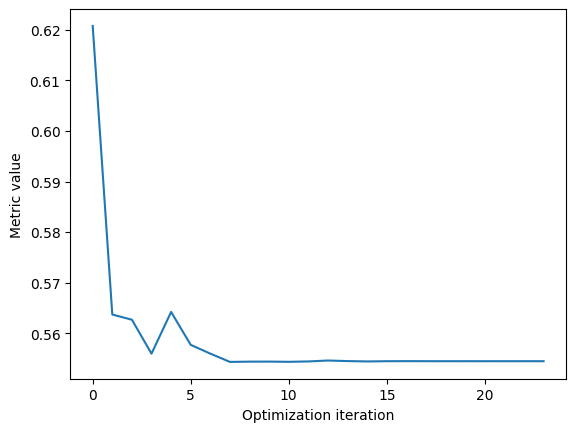

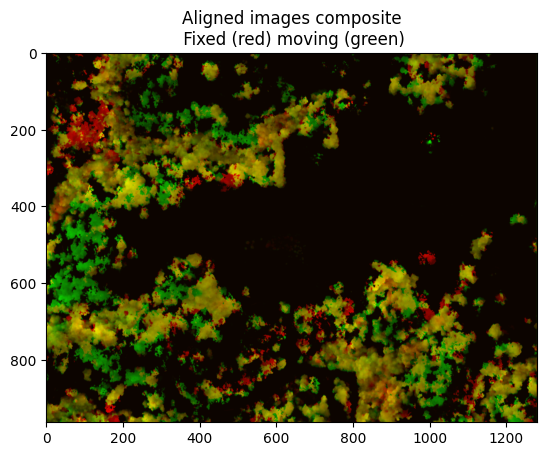

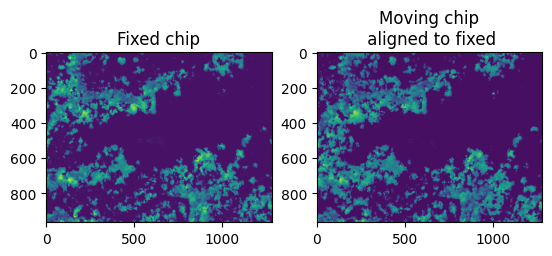

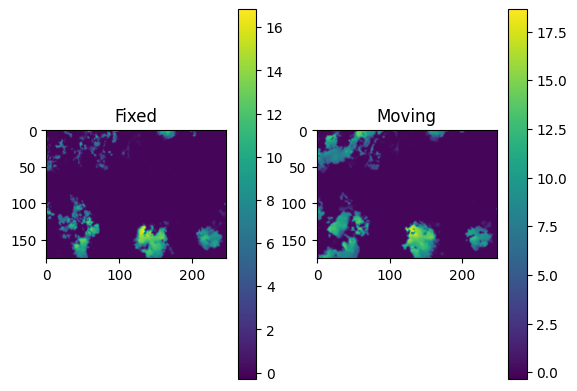

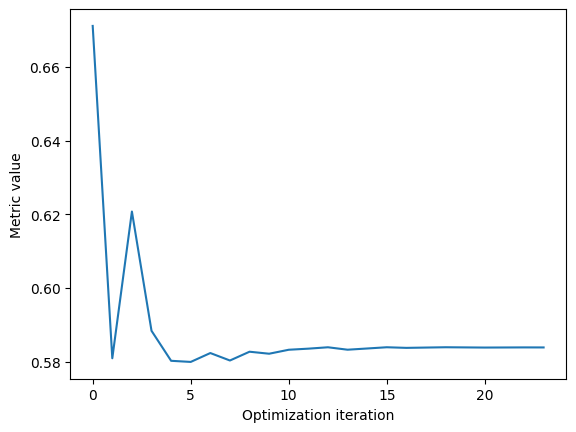

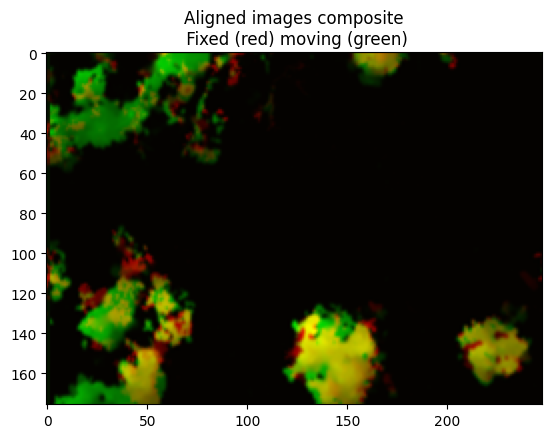

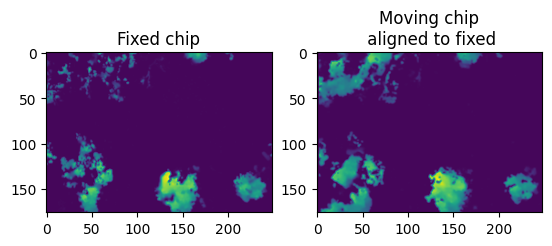

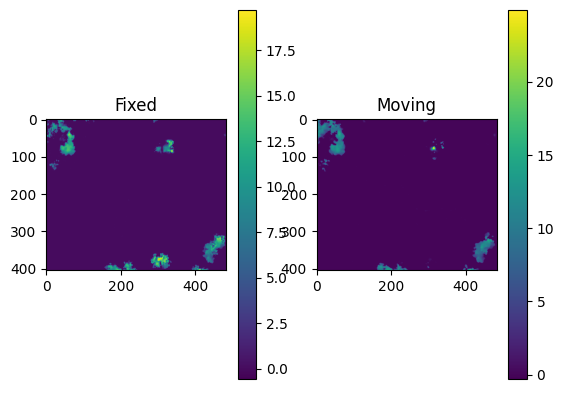

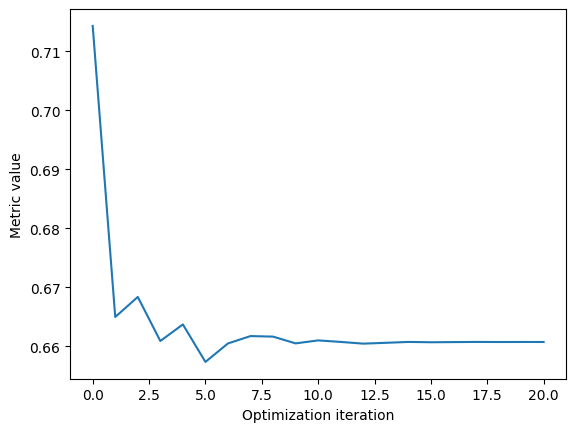

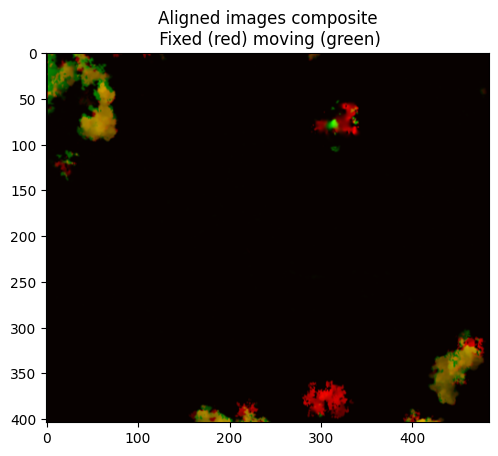

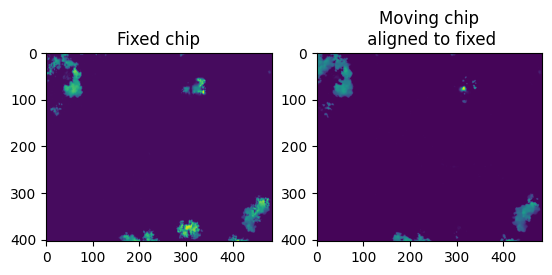

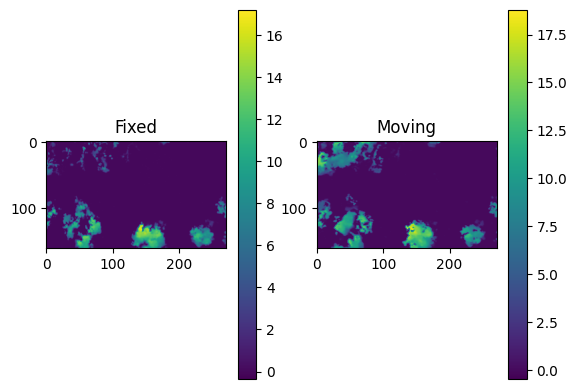

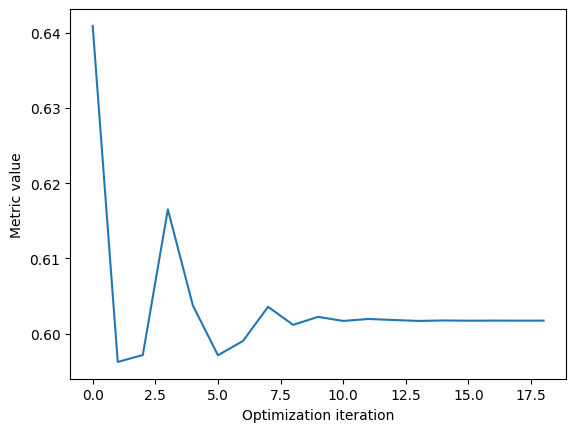

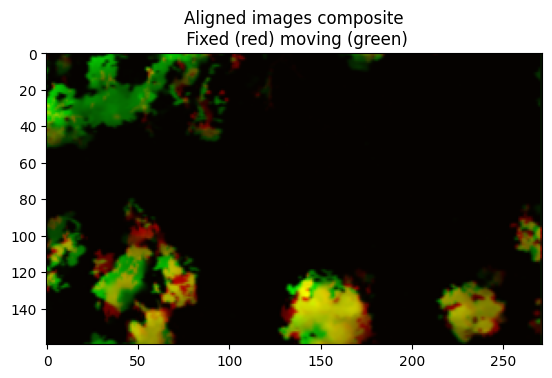

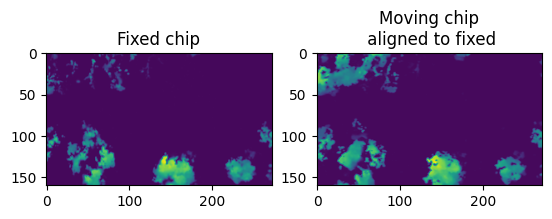

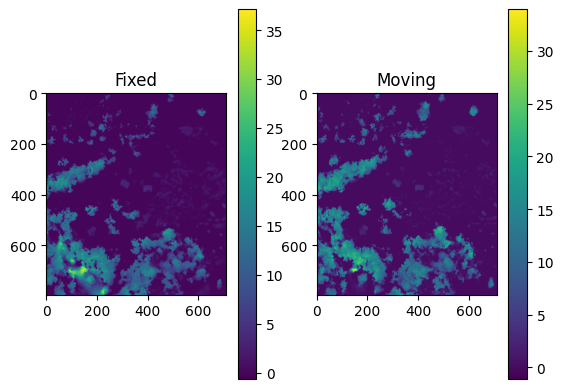

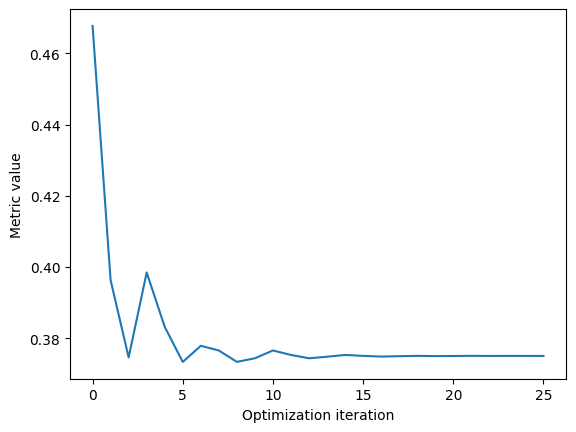

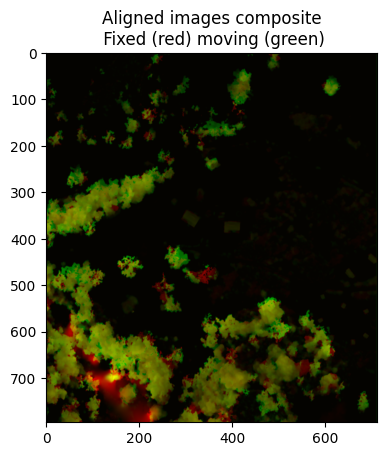

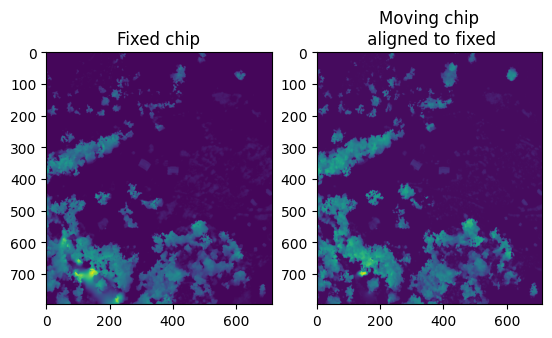

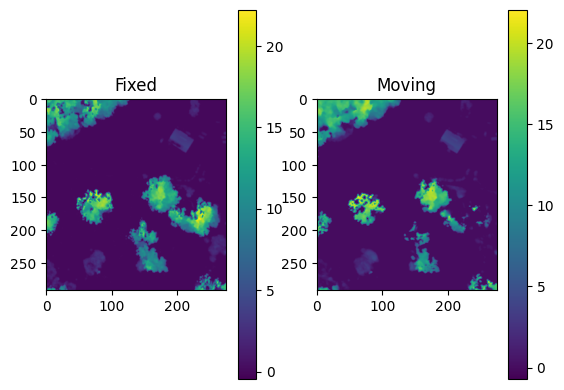

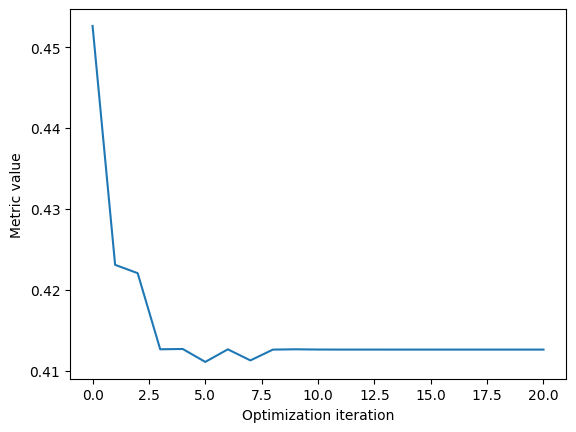

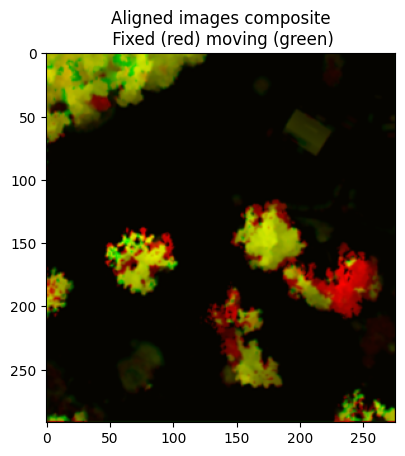

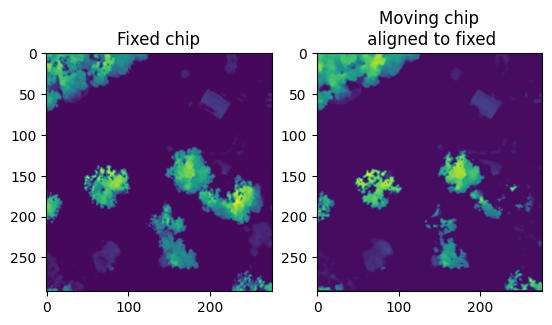

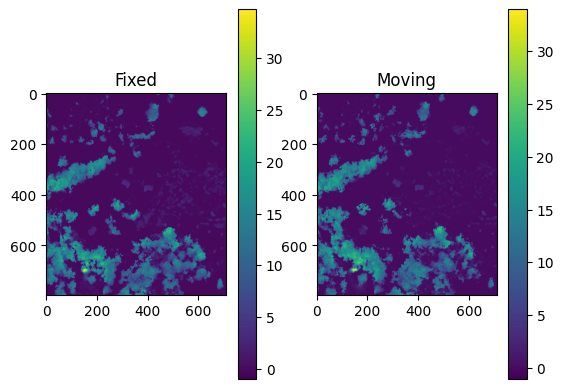

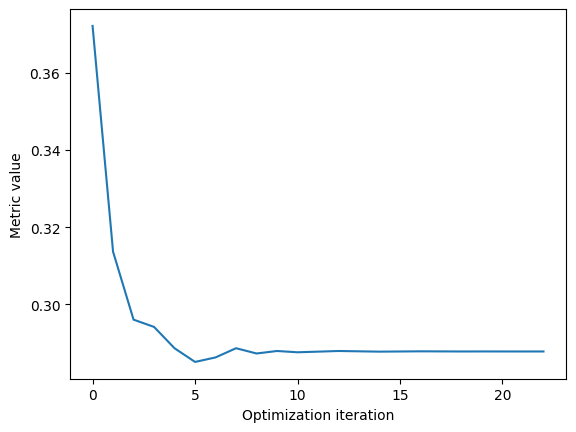

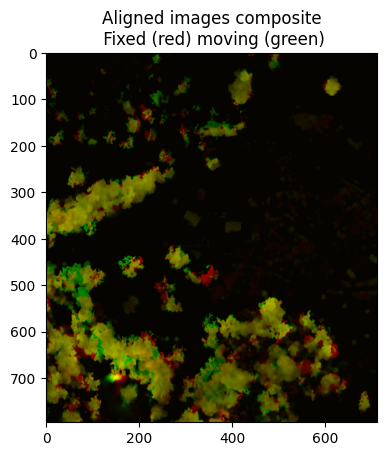

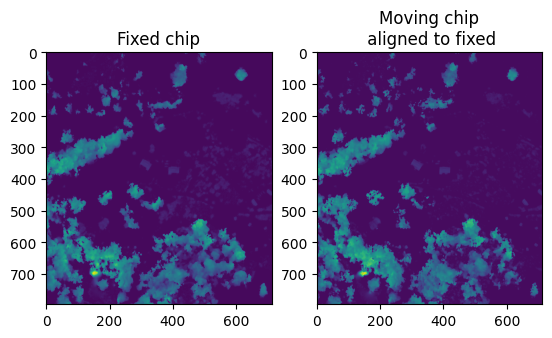

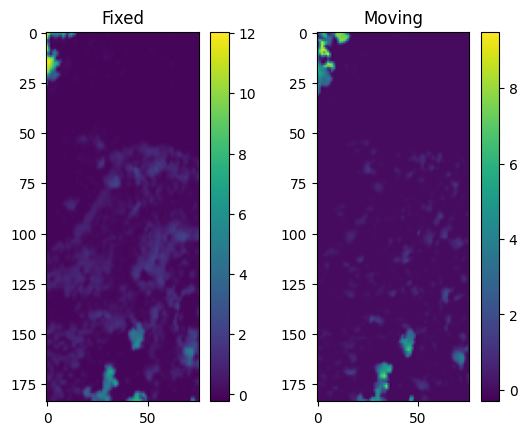

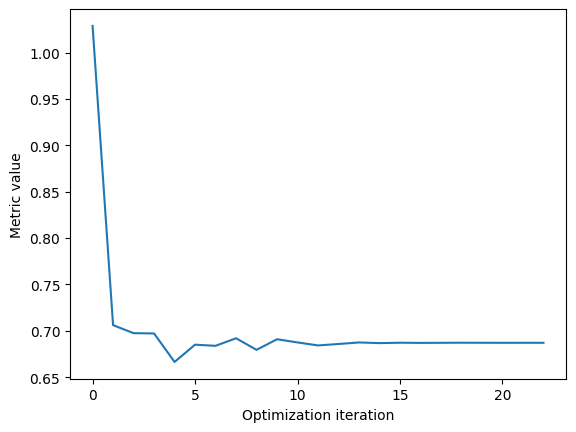

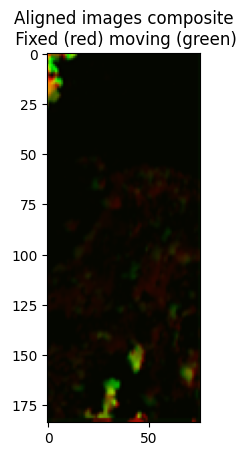

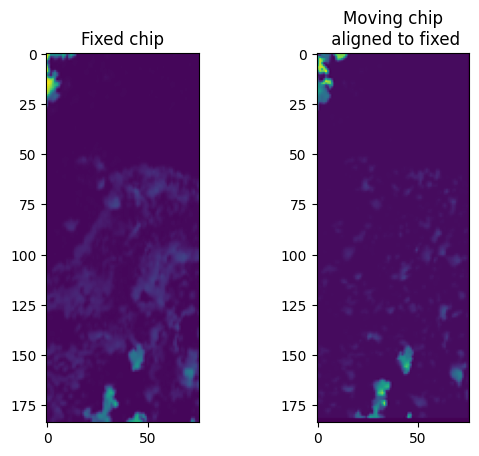

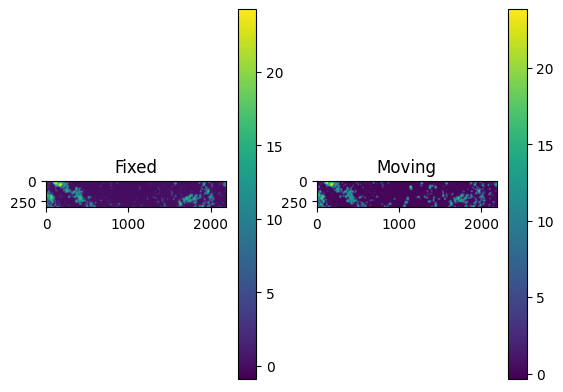

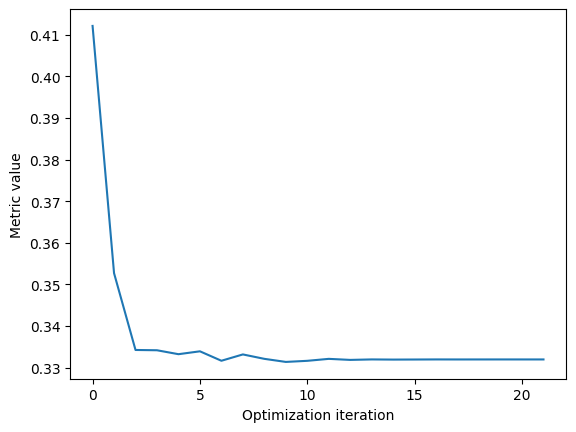

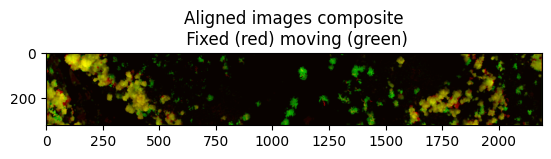

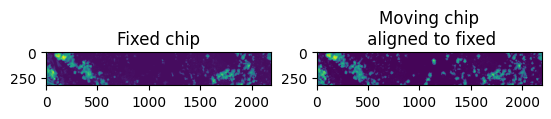

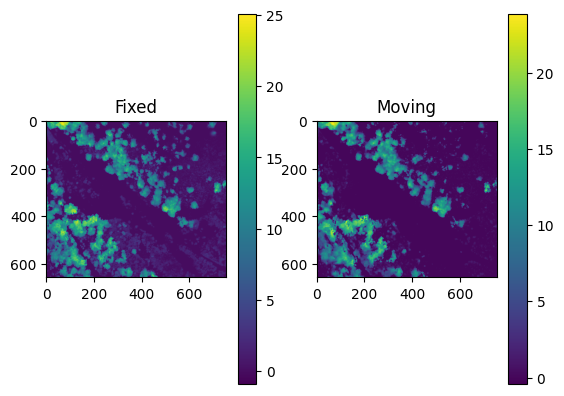

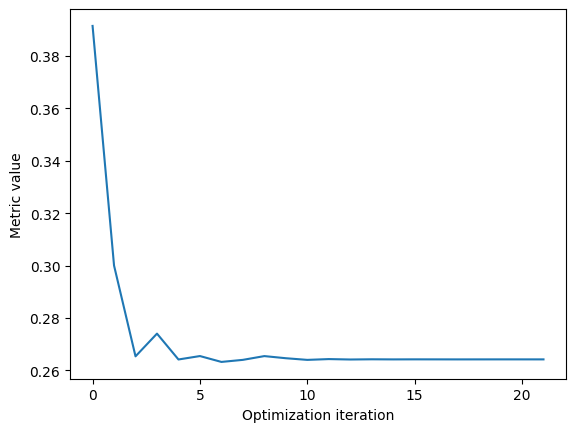

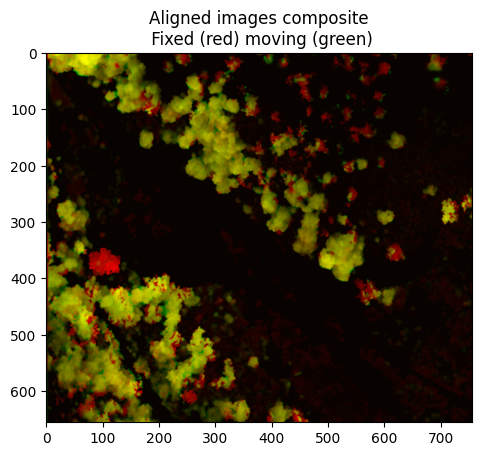

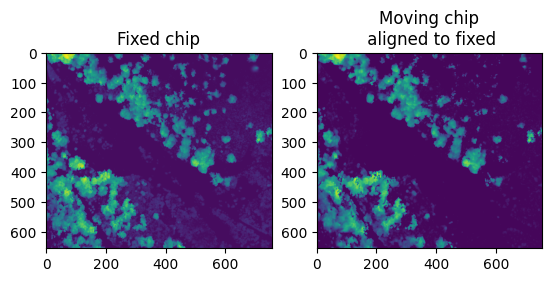

In [3]:
predicted_shifts = []

for WHICH_DATASET in range(len(DATASET_IDS)):
    dataset_ids = DATASET_IDS[WHICH_DATASET]
    FIXED_CHM_FILENAME = Path(
        DATA_FOLDER, RASTER_FOLDER, f"{RASTER_PREFIX}-{dataset_ids[0]}.tif"
    )
    MOVING_CHM_FILENAME = Path(
        DATA_FOLDER, RASTER_FOLDER, f"{RASTER_PREFIX}-{dataset_ids[1]}.tif"
    )

    transforms = align_two_rasters(
        FIXED_CHM_FILENAME,
        MOVING_CHM_FILENAME,
        aligner_alg=sitk_intensity_registration,
        target_GSD=TARGET_GSD,
        aligner_kwargs={"align_means": False},
        vis_chips=True,
        vis_kwargs={},
    )
    predicted_shifts.append(
        (
            transforms["geospatial_mv2fx_transform"][0, 2],
            transforms["geospatial_mv2fx_transform"][1, 2],
        )
    )

In [4]:
print(predicted_shifts)

[(9.628620806033723, 43.34683347774262), (3.1133308794524055, 18.906613559971447), (-0.5757214224722702, -1.2602334912517108), (0.9980953585181851, -0.29207704958389513), (1.0413034328666981, -0.0741210333944764), (-0.3567190253234003, -0.48214141667995136), (-1.1073555557522923, -1.6880008459556848), (-0.2611015548754949, 0.7173068406409584), (-0.07009615944116376, -1.738842391045182), (-0.5356147147540469, 1.2391887683916138), (-0.8515425038931426, -1.6086194685049122), (1.9288260909961537, -0.31108915733057074)]
